<a href="https://colab.research.google.com/github/VahidNsr/Image_Recognition_Fashion_MNIST/blob/master/Image_Recognition_Case_Study_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Recognition - Case Study: Fashion MNIST**

## By Vahid Naseri

## **Import Liberaries**

In [1]:
#Required Libraries
import numpy as np                      #for numerical computation
import pandas as pd                     #for data analysis and data manipulation
import matplotlib.pyplot as plt         #for data visualization
import seaborn as sns                   #for data visualization
import tensorflow as tf                 #for machine learning and deep neural network
from tensorflow import keras

In [2]:
tf.__version__

'2.15.0'

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


## **Creating Dataset**

In [4]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
y_train.shape

(60000,)

In [7]:
X_test.shape

(10000, 28, 28)

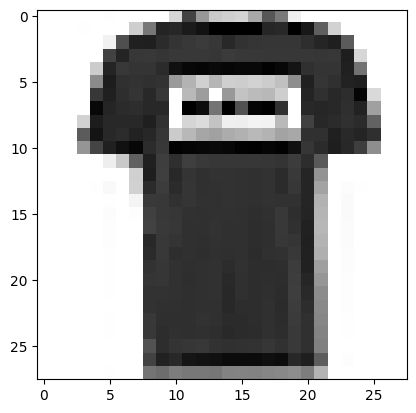

In [8]:
plt.imshow(X_train[1], cmap=plt.cm.binary)

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

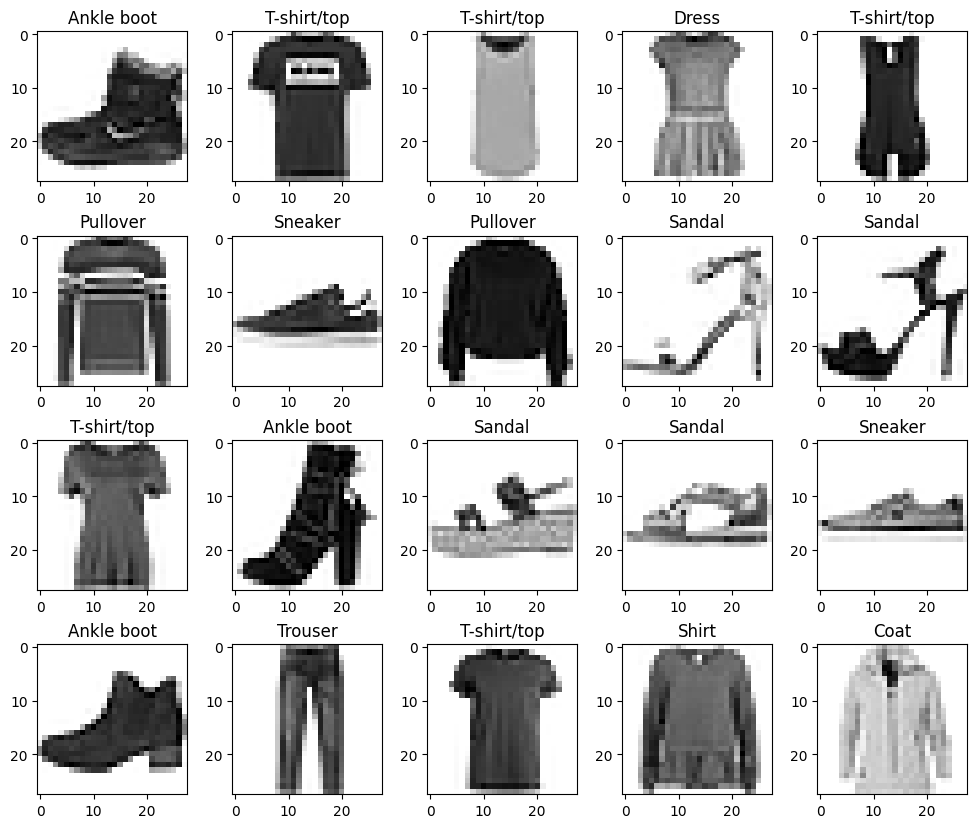

In [11]:
plot = plt.figure(figsize = (12, 10))
plot.subplots_adjust(hspace = 0.3, wspace = 0.3)
for i in range(20):
  a = plot.add_subplot(4, 5, i + 1)
  a.imshow(X_train[i], cmap = plt.cm.binary)
  a.title.set_text(class_names[y_train[i]])

##**Data Preparation for ANN**

In [12]:
X_train_f = X_train.reshape(60000, 28*28)
X_test_f = X_test.reshape(10000, 28*28)

In [13]:
X_train_f = X_train_f / 255
X_test_f = X_test_f / 255

##**Design Deep Learning Models**

### 1. Simple Neural Network


In [14]:
model_ANN = keras.models.Sequential()
model_ANN.add(keras.layers.Dense(10, input_dim = 28 * 28, activation = "softmax"))
model_ANN.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
opt = keras.optimizers.Adam(learning_rate = 0.001) #learning rate
model_ANN.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [16]:
#Train the Model
hist_ANN = model_ANN.fit(X_train_f, y_train, epochs = 50, batch_size = 64, validation_split = 0.3, verbose = 1)

Epoch 1/50
657/657 [==============================] - 3s 3ms/step - loss: 0.7053 - accuracy: 0.7670 - val_loss: 0.5388 - val_accuracy: 0.8194
Epoch 2/50
657/657 [==============================] - 2s 3ms/step - loss: 0.5071 - accuracy: 0.8293 - val_loss: 0.4880 - val_accuracy: 0.8333
Epoch 3/50
657/657 [==============================] - 3s 4ms/step - loss: 0.4657 - accuracy: 0.8423 - val_loss: 0.4630 - val_accuracy: 0.8426
Epoch 4/50
657/657 [==============================] - 2s 3ms/step - loss: 0.4464 - accuracy: 0.8468 - val_loss: 0.4519 - val_accuracy: 0.8478
Epoch 5/50
657/657 [==============================] - 2s 3ms/step - loss: 0.4337 - accuracy: 0.8527 - val_loss: 0.4531 - val_accuracy: 0.8444
Epoch 6/50
657/657 [==============================] - 2s 3ms/step - loss: 0.4240 - accuracy: 0.8544 - val_loss: 0.4435 - val_accuracy: 0.8467
Epoch 7/50
657/657 [==============================] - 2s 3ms/step - loss: 0.4165 - accuracy: 0.8572 - val_loss: 0.4379 - val_accuracy: 0.8481
Epoch 

Text(0.5, 1.0, 'Base Model: Loss - Epochs')

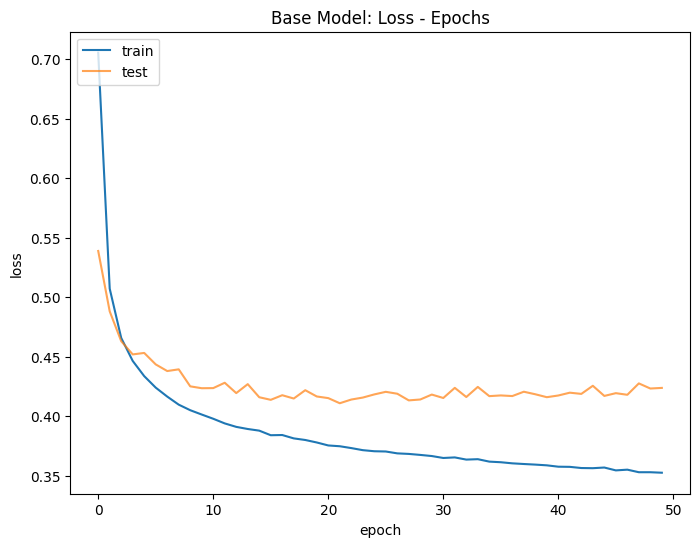

In [17]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ANN.history['loss'], label = 'train')
plt.plot(hist_ANN.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Base Model: Loss - Epochs')

Text(0.5, 1.0, 'Base Model: Accuracy - Epochs')

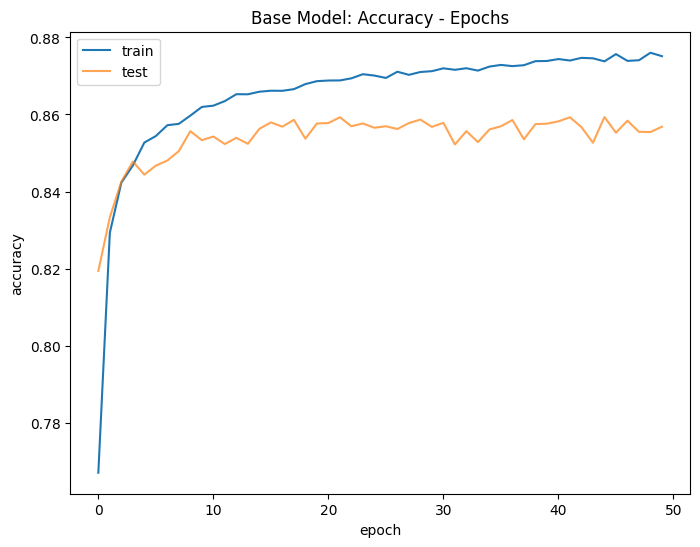

In [18]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ANN.history['accuracy'], label = 'train')
plt.plot(hist_ANN.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Base Model: Accuracy - Epochs')

### 2. Deep Neural Network with Three Layers

In [19]:
model_ThL = keras.models.Sequential()
weight_initializer = initializer = tf.keras.initializers.HeNormal()
model_ThL.add(keras.layers.Dense(128, input_dim = 28 * 28, activation = "relu", kernel_initializer = weight_initializer))
model_ThL.add(keras.layers.Dense(128, activation = "relu", kernel_initializer = weight_initializer))
model_ThL.add(keras.layers.Dense(128, activation = "relu", kernel_initializer = weight_initializer))
model_ThL.add(keras.layers.Dense(10, activation = "softmax", kernel_initializer = weight_initializer))
model_ThL.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134794 (526.54 KB)
Trainable params: 134794 (526.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer HeNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [20]:
opt = keras.optimizers.Adam(learning_rate = 0.001) #learning rate
model_ThL.compile(optimizer = opt, loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [21]:
hist_ThL = model_ThL.fit(X_train_f, y_train, epochs = 20, batch_size = 64, validation_split = 0.3, verbose = 1)

Epoch 1/20
657/657 [==============================] - 5s 7ms/step - loss: 0.5275 - accuracy: 0.8130 - val_loss: 0.4367 - val_accuracy: 0.8406
Epoch 2/20
657/657 [==============================] - 6s 9ms/step - loss: 0.3824 - accuracy: 0.8610 - val_loss: 0.3908 - val_accuracy: 0.8601
Epoch 3/20
657/657 [==============================] - 4s 6ms/step - loss: 0.3445 - accuracy: 0.8743 - val_loss: 0.3553 - val_accuracy: 0.8705
Epoch 4/20
657/657 [==============================] - 4s 6ms/step - loss: 0.3237 - accuracy: 0.8808 - val_loss: 0.3501 - val_accuracy: 0.8726
Epoch 5/20
657/657 [==============================] - 6s 9ms/step - loss: 0.3002 - accuracy: 0.8877 - val_loss: 0.3535 - val_accuracy: 0.8730
Epoch 6/20
657/657 [==============================] - 4s 6ms/step - loss: 0.2869 - accuracy: 0.8920 - val_loss: 0.3231 - val_accuracy: 0.8827
Epoch 7/20
657/657 [==============================] - 4s 6ms/step - loss: 0.2715 - accuracy: 0.8967 - val_loss: 0.3502 - val_accuracy: 0.8763
Epoch 

Text(0.5, 1.0, '3-Layer Model: Loss - Epochs')

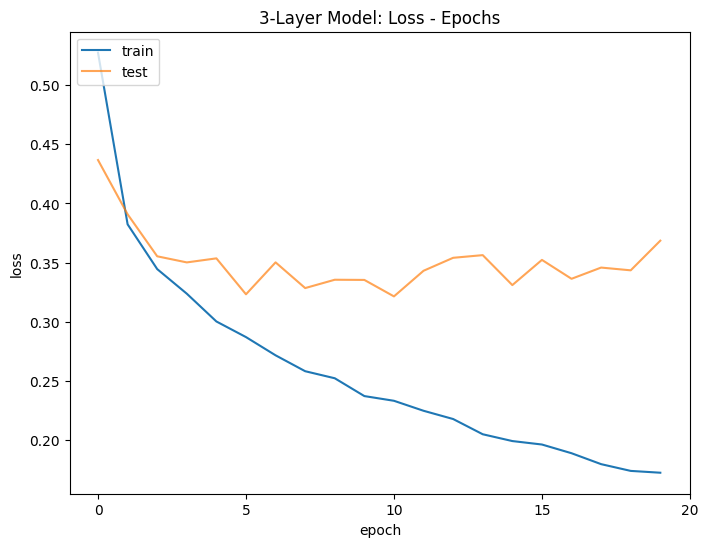

In [22]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ThL.history['loss'], label = 'train')
plt.plot(hist_ThL.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 21, 5))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('3-Layer Model: Loss - Epochs')

Text(0.5, 1.0, '3-Layer Model: Accuracy - Epochs')

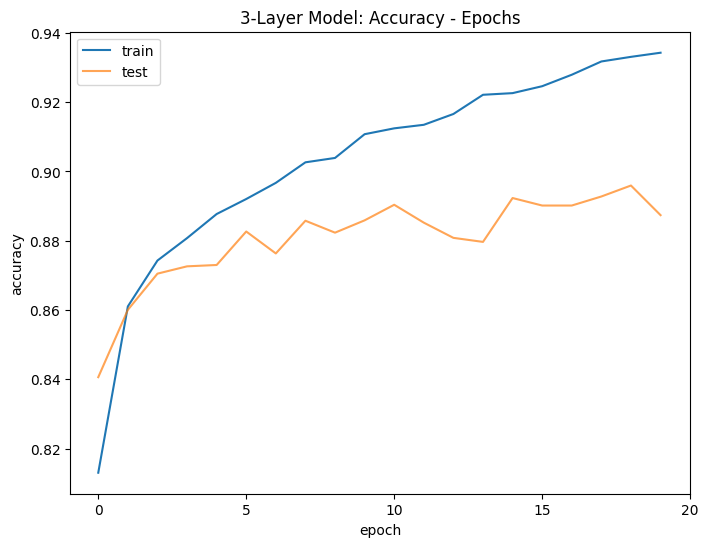

In [23]:
plt.figure(figsize = (8, 6))
plt.plot(hist_ThL.history['accuracy'], label = 'train')
plt.plot(hist_ThL.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 21, 5))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('3-Layer Model: Accuracy - Epochs')

### Dropout

In [24]:
  model_SLR = keras.models.Sequential()
  weight_initializer = initializer = tf.keras.initializers.HeNormal()
  model_SLR.add(keras.layers.Dense(128, input_dim = 28 * 28, activation = "relu", kernel_initializer = weight_initializer))
  model_SLR.add(keras.layers.Dropout(0.1))
  model_SLR.add(keras.layers.Dense(10, activation = "softmax", kernel_initializer = weight_initializer))
  model_SLR.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [25]:
hist_SLR = model_SLR.fit(X_train_f, y_train, epochs = 40, batch_size = 32, validation_split = 0.3, verbose = 1)

Epoch 1/40
1313/1313 [==============================] - 10s 7ms/step - loss: 0.5499 - accuracy: 0.8086 - val_loss: 0.4309 - val_accuracy: 0.8459
Epoch 2/40
1313/1313 [==============================] - 6s 4ms/step - loss: 0.4059 - accuracy: 0.8543 - val_loss: 0.3832 - val_accuracy: 0.8626
Epoch 3/40
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3653 - accuracy: 0.8662 - val_loss: 0.3572 - val_accuracy: 0.8707
Epoch 4/40
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3409 - accuracy: 0.8745 - val_loss: 0.3502 - val_accuracy: 0.8740
Epoch 5/40
1313/1313 [==============================] - 8s 6ms/step - loss: 0.3239 - accuracy: 0.8799 - val_loss: 0.3378 - val_accuracy: 0.8788
Epoch 6/40
1313/1313 [==============================] - 6s 5ms/step - loss: 0.3065 - accuracy: 0.8862 - val_loss: 0.3562 - val_accuracy: 0.8726
Epoch 7/40
1313/1313 [==============================] - 8s 6ms/step - loss: 0.2964 - accuracy: 0.8907 - val_loss: 0.3210 - val_accuracy

Text(0.5, 1.0, 'Final Model: Loss - Epochs')

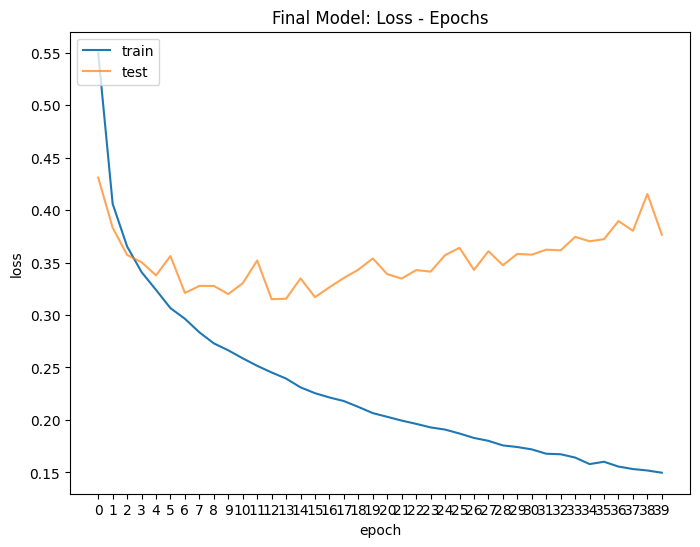

In [26]:
#Loss - Epochs
plt.figure(figsize = (8, 6))
plt.plot(hist_SLR.history['loss'], label = 'train')
plt.plot(hist_SLR.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 40, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Loss - Epochs')

Text(0.5, 1.0, 'Final Model: Accuracy - Epochs')

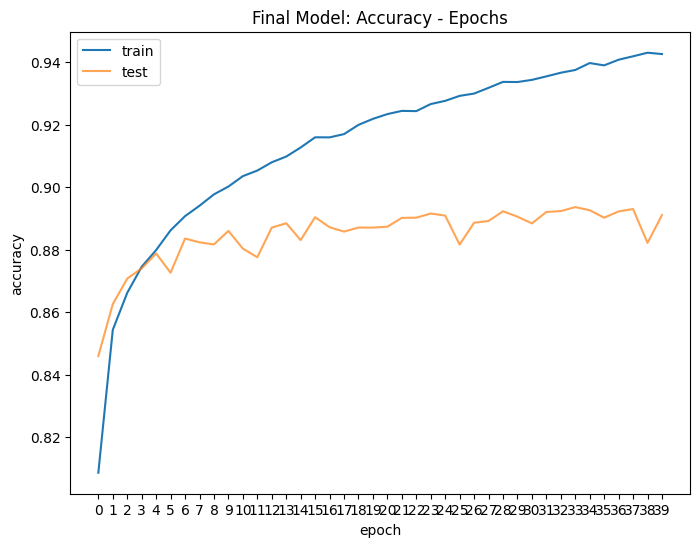

In [27]:
#Accuracy - Epochs
plt.figure(figsize = (8, 6))
plt.plot(hist_SLR.history['accuracy'], label = 'train')
plt.plot(hist_SLR.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.xticks(np.arange(0, 40, 1))
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('Final Model: Accuracy - Epochs')

In [28]:
y_pred = model_SLR.predict(X_test_f)

313/313 [==============================] - 1s 2ms/step


In [34]:
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([9, 2, 1, ..., 8, 1, 5])

In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred) * 100

88.3

##**Data Preparation for CNN**

In [36]:
X_train.shape

(60000, 28, 28)

In [37]:
X_train_cnn = X_train.reshape(-1,28,28,1)
X_test_cnn = X_test.reshape(-1,28,28,1)

In [38]:
print(X_train_cnn.shape)
print(X_test_cnn.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [39]:
X_train_cnn = X_train_cnn / 255
X_test_cnn = X_test_cnn / 255

In [40]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes = 10)
y_test  = to_categorical(y_test, num_classes = 10)

##**Design CNN Model**

In [41]:
model_cnn = keras.models.Sequential()
model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu',
              kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu',
              kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.MaxPooling2D((2, 2)))
model_cnn.add(keras.layers.Conv2D(filters = 64, kernel_size = (2, 2), activation = 'relu',
              kernel_initializer = 'he_uniform', input_shape = (28, 28, 1)))
model_cnn.add(keras.layers.Dropout(0.25))
model_cnn.add(keras.layers.Flatten())
model_cnn.add(keras.layers.Dense(64, activation = 'relu', kernel_initializer = 'he_uniform'))
model_cnn.add(keras.layers.Dense(10, activation = 'softmax'))
model_cnn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 64)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        16448     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          16448     
                                                                 
 dropout_1 (Dropout)         (None, 5, 5, 64)         

In [42]:
model_cnn.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [43]:
model_cnn.fit(X_train_cnn, y_train, epochs = 30, batch_size = 256, validation_split = 0.3)

Epoch 1/30
165/165 [==============================] - 97s 570ms/step - loss: 0.6920 - accuracy: 0.7507 - val_loss: 0.4116 - val_accuracy: 0.8516
Epoch 2/30
165/165 [==============================] - 65s 396ms/step - loss: 0.3981 - accuracy: 0.8546 - val_loss: 0.3597 - val_accuracy: 0.8682
Epoch 3/30
165/165 [==============================] - 63s 383ms/step - loss: 0.3402 - accuracy: 0.8754 - val_loss: 0.3280 - val_accuracy: 0.8812
Epoch 4/30
165/165 [==============================] - 61s 373ms/step - loss: 0.3150 - accuracy: 0.8840 - val_loss: 0.3037 - val_accuracy: 0.8876
Epoch 5/30
165/165 [==============================] - 60s 366ms/step - loss: 0.2892 - accuracy: 0.8936 - val_loss: 0.2874 - val_accuracy: 0.8953
Epoch 6/30
165/165 [==============================] - 57s 344ms/step - loss: 0.2683 - accuracy: 0.9016 - val_loss: 0.2916 - val_accuracy: 0.8920
Epoch 7/30
165/165 [==============================] - 57s 347ms/step - loss: 0.2570 - accuracy: 0.9030 - val_loss: 0.2800 - val_ac

Text(0.5, 1.0, 'CNN Model: Loss - Epochs')

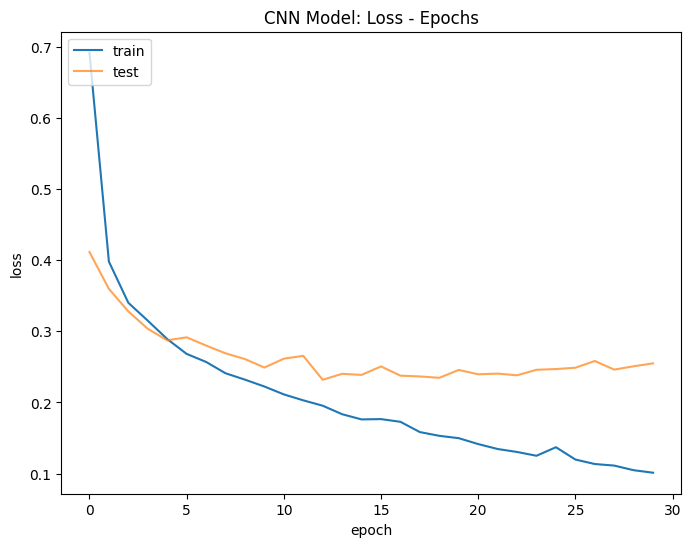

In [44]:
plt.figure(figsize = (8, 6))
plt.plot(model_cnn.history.history['loss'], label = 'train')
plt.plot(model_cnn.history.history['val_loss'], alpha = 0.7, label = 'test')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Loss - Epochs')

Text(0.5, 1.0, 'CNN Model: Accuracy - Epochs')

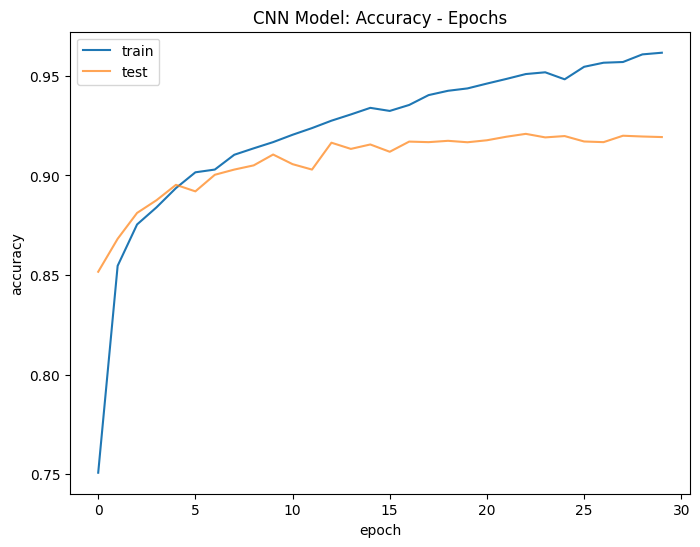

In [45]:
plt.figure(figsize = (8, 6))
plt.plot(model_cnn.history.history['accuracy'], label = 'train')
plt.plot(model_cnn.history.history['val_accuracy'], alpha = 0.7, label = 'test')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.title('CNN Model: Accuracy - Epochs')

In [46]:
y_pred = model_cnn.predict(X_test_cnn)

313/313 [==============================] - 3s 11ms/step


In [47]:
T = 0
F = 0

for i in range(y_test.shape[0]):
  if np.argmax(y_test[i]) == np.argmax(y_pred [i]):
      T = T + 1
  else:
      F = F + 1

Accuracy = T / y_test.shape[0]

print(Accuracy)

0.9132


## **End Of The Code**